### Importing libraries

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline

### Loading Datasets

In [187]:
df1 = pd.read_csv("dataset_21.csv")
df2 = pd.read_csv("dataset_22.csv")
df3 = pd.read_csv("dataset_23.csv")

# QUESTION 1

#### 1.  Calculate and visualise the daily conversion rate to trial (1st metric) and conversion rate to viewing the video unlock page at least once (2nd metric) (hint: use the users count in the denominator of both metrics). Do you see any patterns, relationships between metrics?Describe them and, if possible, explain them.


##### Exploratory Data Analysis

In [188]:
df1.head() # Let's check the all columns and their names. First looking at the dataset if it imported correct etc. ...

,action_date,users,unlock_users,trial_users
0,2019-09-11,1894,184,1
1,2019-09-12,3915,651,4
2,2019-09-13,4315,732,13
3,2019-09-14,5096,949,19
4,2019-09-15,6321,1103,23


In [189]:
 df1.info()  # to check dataset's general info --> dtypes of the columns, how many rows and columns and NaN values etc. ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   action_date   32 non-null     object
 1   users         32 non-null     int64 
 2   unlock_users  32 non-null     int64 
 3   trial_users   32 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [190]:
df1.shape  # we can also learn the shape of our dataset as row and column numbers like this

(32, 4)

In [191]:
df1.isnull().sum()/df1.shape[0]*100  # df.shape[0] --> row number of whole dataset, so we can calculate the percentage of null values of each columns have.

action_date     0.0
users           0.0
unlock_users    0.0
trial_users     0.0
dtype: float64

#### Adding two more columns for rates

In [192]:
df1["trial_conv_rate"] = df1["trial_users"] / df1["users"]
df1["video_conv_rate"] = df1["unlock_users"] / df1["users"]

df1.head()

,action_date,users,unlock_users,trial_users,trial_conv_rate,video_conv_rate
0,2019-09-11,1894,184,1,0.000528,0.097149
1,2019-09-12,3915,651,4,0.001022,0.166284
2,2019-09-13,4315,732,13,0.003013,0.169641
3,2019-09-14,5096,949,19,0.003728,0.186224
4,2019-09-15,6321,1103,23,0.003639,0.174498


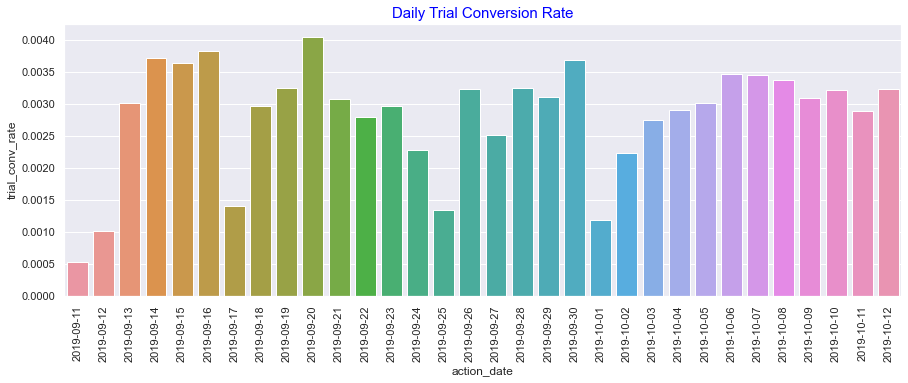

In [193]:
fig, ax =plt.subplots(figsize=(15,5))
ax = sns.barplot(x=df1.action_date, y=df1.trial_conv_rate)
ax.set_xticklabels(df1.action_date, rotation = 90)
ax.set_title('Daily Trial Conversion Rate',color = 'blue',fontsize=15);

As we seen it above table, We have almost same conversion rate for the same day of the week. Generally users are more prone to be convert on the Friday, Saturday and Sunday. We have very low trial conversion rate on the middle of the week. 

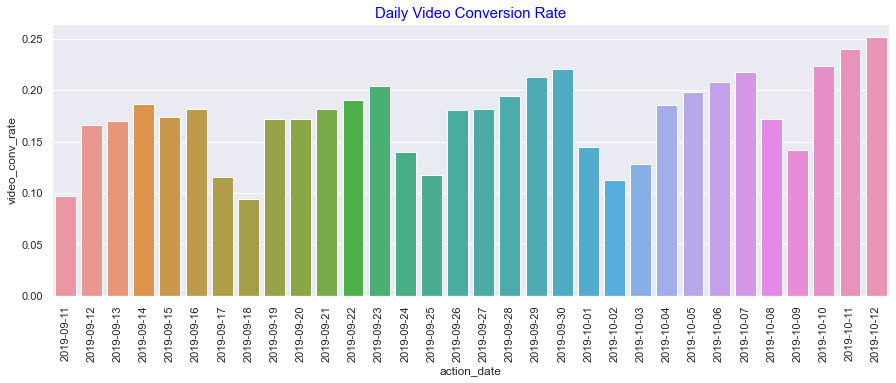

In [194]:
fig, ax =plt.subplots(figsize=(15,5))
ax = sns.barplot(x=df1.action_date, y=df1.video_conv_rate)
ax.set_xticklabels(df1.action_date, rotation = 90)
ax.set_title('Daily Video Conversion Rate',color = 'blue',fontsize=15);

As we seen it above table, there is a increase in video unlocking rate week by week. Due to the almost same trial conversion rate and increasing number in users, they start to use unlocking options by watching video more frequently. Here again we have a pattern for the days of week like Friday, Saturday and Sunday. Middle days of the week are stil in lower position in terms of video conversion rate.

# QUESTION 2

## Compare the behaviour of 2 segments of users - users who converted to trial and users who didn't convert. Look at the overall volumes and for each segment calculate the shares of users who, during the whole analysed period:
a. added at least 1 answer,

b. added at least 1 question,

c. read 5 or more answers,

d. used OCR at least 1 time

e. got an instant answer at least 1 time.


In [195]:
df2.head()

,user_converted_to_trial,users_all,users_at_least_1_answer_added,users_at_least_1_question_added,users_at_least_5_answers_read,users_at_least_1_ocr,users_at_least_1_instant_answer
0,didn't convert,154894,5822,17496,51311,69678,24418
1,converted,1036,8,111,969,876,722


In [196]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   user_converted_to_trial          2 non-null      object
 1   users_all                        2 non-null      int64 
 2   users_at_least_1_answer_added    2 non-null      int64 
 3   users_at_least_1_question_added  2 non-null      int64 
 4   users_at_least_5_answers_read    2 non-null      int64 
 5   users_at_least_1_ocr             2 non-null      int64 
 6   users_at_least_1_instant_answer  2 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 240.0+ bytes


#### We dont have any issues with the dataset.

In [197]:
df2.iloc[:1,2:] = df2.iloc[:1,2:].applymap(lambda x: x/309788)  # chaneged with their percentage value.
df2.iloc[1:,2:] = df2.iloc[1:,2:].applymap(lambda x: x/1036)

df2.head()

,user_converted_to_trial,users_all,users_at_least_1_answer_added,users_at_least_1_question_added,users_at_least_5_answers_read,users_at_least_1_ocr,users_at_least_1_instant_answer
0,didn't convert,154894,0.018793,0.056477,0.165633,0.224922,0.078822
1,converted,1036,0.007722,0.107143,0.935328,0.845560,0.696911


In [198]:
df2.set_index("user_converted_to_trial").transpose().drop("users_all")

user_converted_to_trial,didn't convert,converted
users_at_least_1_answer_added,0.018793,0.007722
users_at_least_1_question_added,0.056477,0.107143
users_at_least_5_answers_read,0.165633,0.935328
users_at_least_1_ocr,0.224922,0.845560
users_at_least_1_instant_answer,0.078822,0.696911


# QUESTION 3

## Prepare a visualisation of distributions of total answers read per user for 2 segments: users who converted to trial vs users who didn't convert. Prepare a comparison of the descriptive statistics across both segments. How can we interpret and use the results?


In [199]:
df3.head(10)

,user_pseudo_id,user_converted_to_trial,read_an_answer_sum
0,Rgkf9DWtzMHQv4iKgjDhftiyPbc=,0,51
1,UgwjaLdh6XNsqB8dOxEmt6zHrBQ=,0,403
2,vXo64eC6/XfDpWWAngTex9zJ4Qs=,0,35
3,KyzNY8sC4ex1LEL9H9y3QO1VRKw=,0,33
4,dLz+jCeLxtCRdC2+wUUWlB/DW4E=,0,68
5,4c6TeuFMY9rr9tdD/aESgPMrwRQ=,1,34
6,lXVyjM55t6fM79KByGphqumWA3s=,0,30
7,fn5maBpTVPV6MirVIRgG4tmKhUM=,0,47
8,dJ702A4TT1VLzLbbighbP93V4eY=,0,34
9,9pXjhZ+jST/ZxXEBr22feITLFRg=,0,64


In [200]:
df4 = df3.groupby(["user_converted_to_trial"]).mean("read_an_answer_sum")
df4.reset_index()

,user_converted_to_trial,read_an_answer_sum
0,0,8.382140
1,1,31.779923


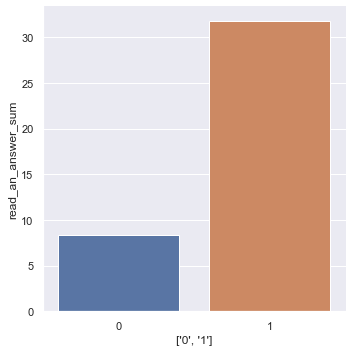

In [201]:
sns.catplot(x=["0","1"], y = "read_an_answer_sum",data=df4 ,kind="bar")


### There is almost 4 times bigger chance to read an answer if the user is converted.

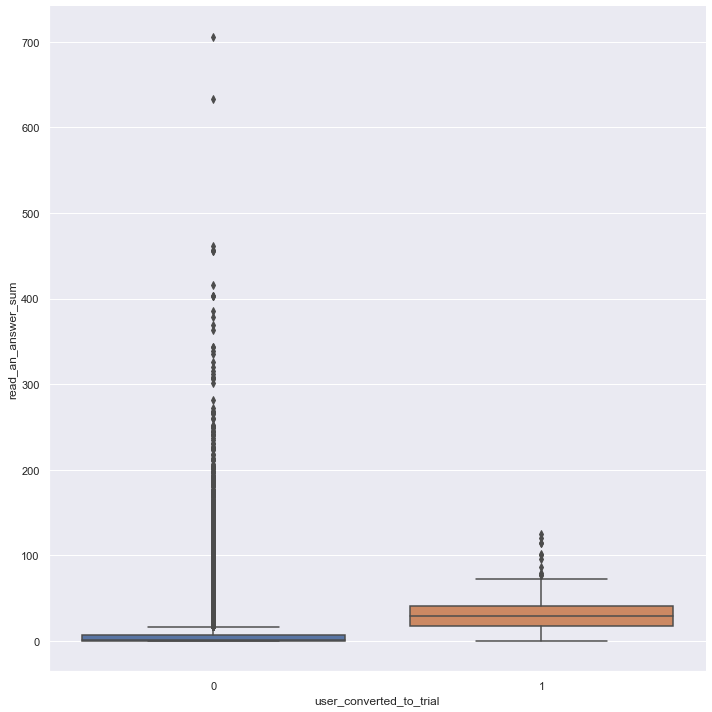

In [202]:
sns.catplot(ax = ax, x="user_converted_to_trial", y = "read_an_answer_sum",data=df3 ,kind="box",  height=10, aspect=1)